### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm


### Main

How many combinations are there?

In [2]:
perms = [1,1]

for i in range(2,26):
    perms.append(perms[i-1] + perms[i-2])
    
df_perms = pd.DataFrame({
    'n': [i for i in range(1,27)],
    'Permutations': perms
})

print(f'Ways to hit 25: {perms[24]}')


Ways to hit 25: 75025


Let's work out values for $P(n)$ up to $n=24$.

In [3]:
iterations = 10000
p = 0.5
n_vals = [i for i in range(1, 25)]
prob_vals = []

for n in tqdm(n_vals):
    ind = 0
    for _ in range(iterations):
        pos = 1
        while pos < n:
            pos += np.random.choice([1,2], p=[p,1-p])

        if pos == n:
            ind += 1
    
    prob_vals.append(ind/iterations)

df = pd.DataFrame({
    'n': n_vals,
    'P(n)': prob_vals
})

display(df)


100%|███████████████████████████████████████████| 24/24 [00:20<00:00,  1.17it/s]


,n,P(n)
0,1,1.0000
1,2,0.4965
2,3,0.7458
3,4,0.6225
4,5,0.6834
5,6,0.6621
6,7,0.6696
7,8,0.6761
8,9,0.6689
9,10,0.6658


Now for $n=25$ like the question asks us.

In [4]:
iterations = 100000
p = 0.5
ind = 0
avg_flips = 0

for _ in tqdm(range(iterations)):
    pos = 1
    flips = 0
    while pos < 25:
        pos += np.random.choice([1,2], p=[p,1-p])
        flips += 1
    if pos == 25:
        ind += 1
    avg_flips += flips
    
print(f'P(25) = {ind/iterations}')
print(f'Average flips = {avg_flips/iterations}')


100%|█████████████████████████████████| 100000/100000 [00:22<00:00, 4441.06it/s]

P(25) = 0.66542
Average flips = 16.22261


Let's work out values mathematically.

In [5]:
vals = [1, 1/2]
n = 6

for i in range(n):
    vals.append(0.5*vals[i] + 0.5*vals[i+1])

df_probs = pd.DataFrame({
    'n': [i for i in range(1,n+3)],
    'P(n)': vals
})

display(df_probs)


,n,P(n)
0,1,1.000000
1,2,0.500000
2,3,0.750000
3,4,0.625000
4,5,0.687500
5,6,0.656250
6,7,0.671875
7,8,0.664062


In [60]:
val = (2/3)*(1-(-1/2)**25)
print(f'P(25) = {val}')
print(f'Error percentage: {100*abs(val-(2/3))/(2/3)}')

P(25) = 0.6666666865348816
Error percentage: 2.9802322443206464e-06


### Extension

We can vary the bias of the coin, changing the chance of flipping a 1.

100%|███████████████████████████████████████████| 21/21 [06:39<00:00, 19.04s/it]


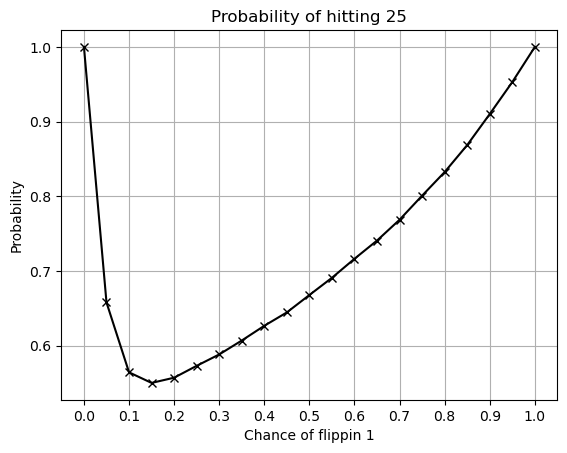

In [57]:
iterations = 100000
p_vals = np.linspace(0,1,21)
probabilities = []

for p in tqdm(p_vals):
    ind = 0
    for _ in range(iterations):
        pos = 1
        while pos < 25:
            pos += np.random.choice([1,2], p=[p,1-p])

        if pos == 25:
            ind += 1
    probabilities.append(ind/iterations)
    
plt.plot(p_vals, probabilities, 'xk', linestyle='-')
plt.title('Probability of hitting 25')
plt.xlabel('Chance of flippin 1')
plt.ylabel('Probability')
plt.xticks(np.linspace(0,1,11))
plt.grid()
plt.show()


Alternatively we can vary the sides of the coin. Let's first decide to give the coin sides $(1,k)$ for various $k$.

100%|███████████████████████████████████████████| 27/27 [01:28<00:00,  3.29s/it]


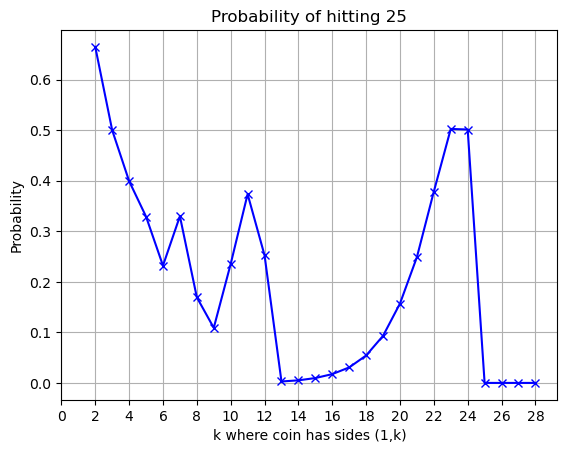

In [51]:
iterations = 100000
n = 28
n_vals = [i for i in range(2,n+1)]
probs = []

for k in tqdm(n_vals):
    ind = 0
    for _ in range(iterations):
        pos = 1
        flips = 0
        while pos < 25:
            pos += np.random.choice([1,k])
            flips += 1
        if pos == 25:
            ind += 1
    
    probs.append(ind/iterations)
    
plt.plot(n_vals, probs, 'xb', linestyle='-')
plt.title('Probability of hitting 25')
plt.xlabel('k where coin has sides (1,k)')
plt.ylabel('Probability')
plt.xticks([i for i in range(n+1)][::2])
plt.grid()
plt.show()


Or what if we used $n$ sided dice instead?

100%|███████████████████████████████████████████| 30/30 [01:57<00:00,  3.92s/it]


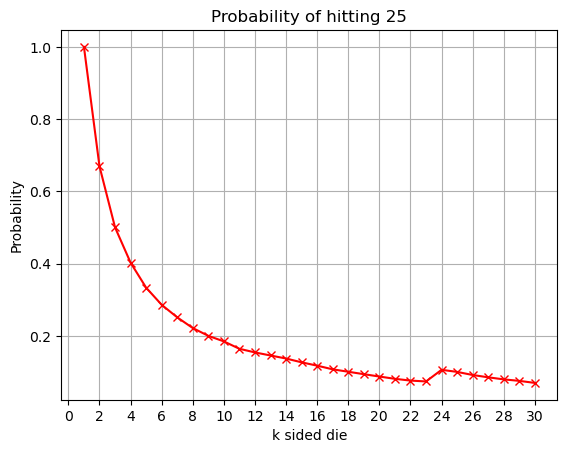

In [50]:
iterations = 100000
n = 30
n_vals = [i for i in range(1,n+1)]
probs = []

for k in tqdm(n_vals):
    ind = 0
    for _ in range(iterations):
        pos = 1
        flips = 0
        while pos < 25:
            pos += np.random.choice([i for i in range(1, k+1)])
            flips += 1
        if pos == 25:
            ind += 1
    probs.append(ind/iterations)
    
plt.plot(n_vals, probs, 'xr', linestyle='-')
plt.title('Probability of hitting 25')
plt.xlabel('k sided die')
plt.ylabel('Probability')
plt.xticks([i for i in range(n+1)][::2])
plt.grid()
plt.show()
